# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Define all imports here

In [1]:
# define all imports here.
import pickle
import hashlib
import os
import pickle
from urllib.request import urlretrieve
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd 
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import tensorflow as tf
from tqdm import tqdm
from skimage import exposure
from tensorflow.contrib.layers import flatten

---
## Define hyper parameters here

In [2]:
# define hyper-parameters
EPOCHS = 200
BATCH_SIZE = 16
rate = 0.0001
CLIP_LIMIT = 0.1


---
## Step 0: Load The Data

In [3]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print ('Loaded data from input files')

Loaded data from input files


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

def check_and_summarize_data(X_train, y_train, 
                             X_valid, y_valid, 
                             X_test , y_test   ):  
      
    # AB: add a sanity check that data is loaded correctly
    assert(len(X_train) == len(y_train))
    assert(len(X_valid) == len(y_valid))
    assert(len(X_test) == len(y_test))
       
    # TODO: Number of training examples
    n_train = len(X_train)
       
    # AB: Number of validation examples
    n_valid = len(X_valid)
       
    # TODO: Number of testing examples.
    n_test = len(X_test)
       
    # TODO: What's the shape of an traffic sign image?
    image_shape = X_train[0].shape
       
    # TODO: How many unique classes/labels there are in the dataset.
    unique_train = set(y_train)
    unique_valid = set(y_valid)
    unique_test  = set(y_test)
    unique_all   = set( np.concatenate((y_train, y_valid, y_test)) )
    #
    n_classes_train = len(unique_train)
    n_classes_valid = len(unique_valid)
    n_classes_test  = len(unique_test)
    n_classes       = len(unique_all)
       
    print("Number of training examples =", n_train)
    print("Number of validation examples =", n_valid)
    print("Number of testing examples =", n_test)
    print("Image data shape =", image_shape)
    print("Number of unique classes in training examples =", n_classes_train)
    print("Number of unique classes in validation examples =", n_classes_valid)
    print("Number of unique classes in testing examples =", n_classes_test)
    print("Number of unique classes in all =", n_classes)


check_and_summarize_data(X_train, y_train, 
                         X_valid, y_valid, 
                         X_test , y_test   )       

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of unique classes in training examples = 43
Number of unique classes in validation examples = 43
Number of unique classes in testing examples = 43
Number of unique classes in all = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

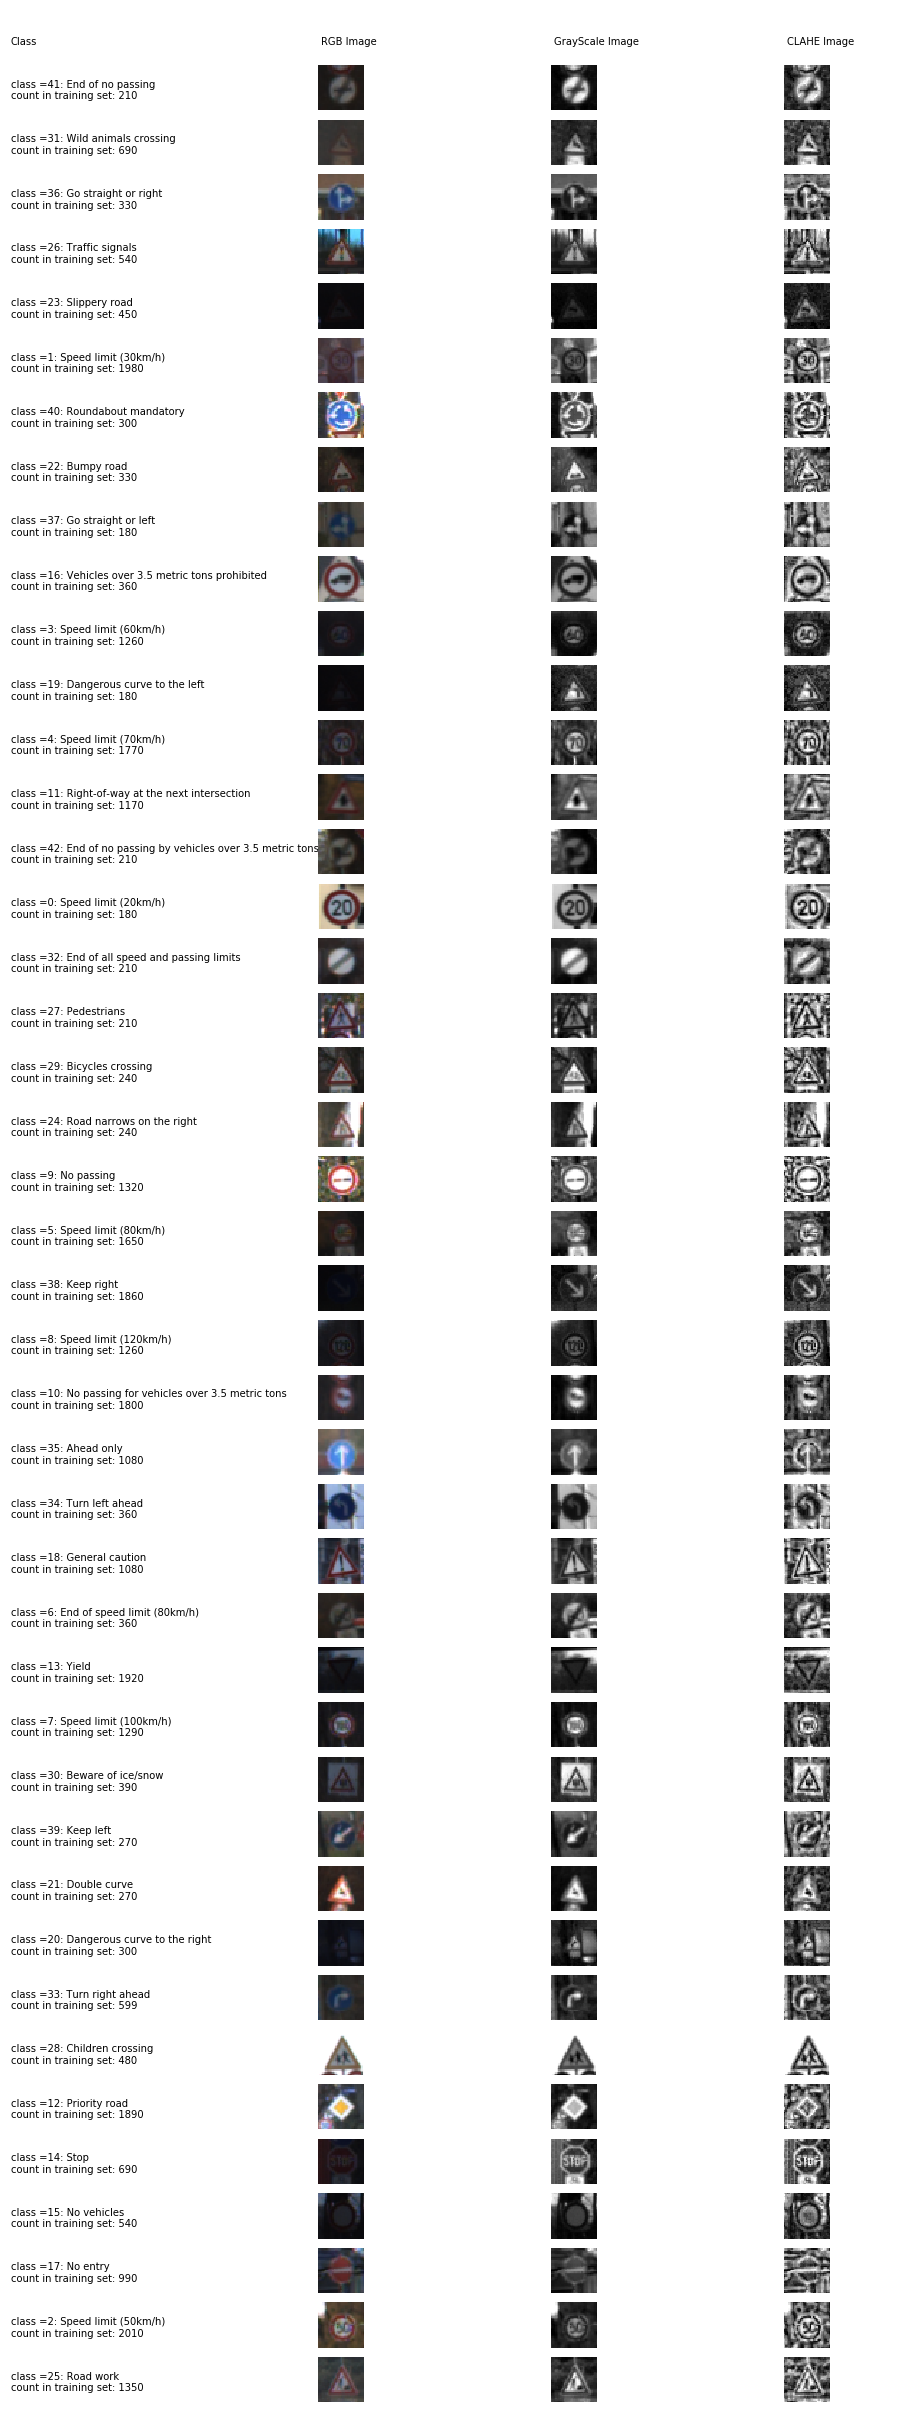

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import cv2
# counts of each class in training data set
class_counts = {}
for y in y_train:
    class_counts[y] = class_counts.get(y,0) + 1
          
# View sample from the unique datasets -> show an image of each class
      
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    
def apply_clahe(img, clip_limit=0.01):
    """Applies a Contrast Limited Adaptive Histogram Equalization (CLAHE)
    for description:
    http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
    """
    return exposure.equalize_adapthist(img, clip_limit=clip_limit)
      
# read sign labels into a panda DataFrame
df = pd.read_csv('signnames.csv')

def plot_image_and_effects_of_grayscale_and_clahe(X_data,y_data,
                                                  filename=None):
    """
    Plots a table showing the effects of gray scale, and also the application
    of a Contrast Limited Adaptive Histogram Equalization (CLAHE)
    
    label  |  RGB image   | Gray Scale image | CLAHE
    """
    class_counts = {}
    for y in y_data:
        class_counts[y] = class_counts.get(y,0) + 1
    
    nrows       = len(set(y_data)) + 1
    ncols       = 4            
    axes_width  = 4            
    axes_height = 1            
    width       = ncols * axes_width    
    height      = nrows * axes_height  
    fontsize    = 10  
    fig, axes   = plt.subplots(nrows, ncols, figsize = (width, height) )
          
    # turn off:
    #  - all tick marks and tick labels
    #  - frame of each axes
    for row in range(nrows):
        for ncol in range(ncols):
            axes[row,ncol].xaxis.set_visible(False)
            axes[row,ncol].yaxis.set_visible(False)
            axes[row,ncol].set_frame_on(False)
          
          
    # Header of columns
    row = 0
    axes[row, 0].text(0.0, 0.25, 
                      'Class',
                      fontsize=fontsize)
    axes[row, 1].text(0.4, 0.25, 
                      'RGB Image',
                      fontsize=fontsize)
    axes[row, 2].text(0.4, 0.25, 
                      'GrayScale Image',
                      fontsize=fontsize)
    axes[row, 3].text(0.4, 0.25, 
                      'CLAHE Image',
                      fontsize=fontsize)
              
    class_shown = []
    row = 1
    for i in range(len(y_data)):
        x, y = X_data[i], y_data[i]
        if y in class_shown:     # We already showed an image of this class
            continue
              
        image = x.squeeze()
        gray  = grayscale(image)
        clahe = apply_clahe(gray, clip_limit=CLIP_LIMIT)  # yet another hyperparameter !!
              
        # show color & grayscale & clahe side by side
              
        # See this for all details on the methods used:
        # http://matplotlib.org/api/axes_api.html
              
        # class label and description stored in first column
        # with counts
        axes[row, 0].text(0.0, 0.25, 
                        ('class =' + str(y) + ': ' +  df.loc[y]['SignName'] +'\n' +
                         'count in training set: ' + str(class_counts[y]) ),
                        fontsize=fontsize)
              
        axes[row,1].imshow(image)
        axes[row,2].imshow(gray, cmap="gray")
        axes[row,3].imshow(clahe, cmap="gray")
              
        class_shown.append(y)
        row += 1
    
    if filename == None:      
        plt.show()  
    else:  
        # When running python directly, not in Jupyter notebook, it is better to
        # write it to a file & view it in an image viewer
        fig.savefig(filename)
        print ('Written the file: '+ filename)
          
    plt.close(fig)
    
plot_image_and_effects_of_grayscale_and_clahe(X_train,y_train,
                                              filename=None)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def grayscale_and_clahe(image_data):
    """
    Convert the image data to grayscale, then clahe
    NOTE: CLAHE image is normalized.
    :param image_data: The image data to be converted & normalized
    :return: Grayscaled and CLAHEd image
    """  
    gray  = grayscale(image_data)
    clahe = apply_clahe(gray, clip_limit=CLIP_LIMIT)  # yet another hyperparameter !!
    return clahe

print('Applying GrayScale & CLAHE to each image in train data set')
train_features = np.array([grayscale_and_clahe(X) for X in tqdm(X_train)])

print('Applying GrayScale & CLAHE to each image in validation data set')
valid_features = np.array([grayscale_and_clahe(X) for X in tqdm(X_valid)])

print('Applying GrayScale & CLAHE to each image in test data set')
test_features  = np.array([grayscale_and_clahe(X) for X in tqdm(X_test)])

train_labels = y_train
valid_labels = y_valid
test_labels  = y_test
is_features_normal = True

# Save the data for easy access
pickle_file = 'signs_prepped.pickle'
#if not os.path.isfile(pickle_file): #..always just overwrite !

try:
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'train_dataset': train_features,
                'train_labels': train_labels,
                'valid_dataset': valid_features,
                'valid_labels': valid_labels,
                'test_dataset': test_features,
                'test_labels': test_labels,
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
      
print('Data cached in pickle file: '+str(pickle_file))

Applying GrayScale & CLAHE to each image in train data set


100%|██████████| 34799/34799 [07:05<00:00, 81.81it/s]


Applying GrayScale & CLAHE to each image in validation data set


100%|██████████| 4410/4410 [00:54<00:00, 80.67it/s]


Applying GrayScale & CLAHE to each image in test data set


100%|██████████| 12630/12630 [02:33<00:00, 82.19it/s]


Data cached in pickle file: signs_prepped.pickle


### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
"""
The LeNet-5 implementation with one addition:
A dropout is added prior to the readout layer
"""
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1_r = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1_p = tf.nn.max_pool(conv1_r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1_p, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2_r = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2_p = tf.nn.max_pool(conv2_r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2_p)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1_r    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_r, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2_r    = tf.nn.relu(fc2)
    
    #ab: add a dropout layer
    #see: https://www.tensorflow.org/get_started/mnist/pros
    fc2_drop = tf.nn.dropout(fc2_r, keep_prob) 

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # Output of this final layer must be equal to the number of classes !
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return conv1, conv2, fc1, fc2, logits  # return all layers, to allow visualization


In [8]:
"""
Features and Labels:
- x is a placeholder for a batch of input images. 
- y is a placeholder for a batch of output labels.
- keep_prob is a placeholder for dropout (0.5 during training, 1.0 during test)
"""
x = tf.placeholder(tf.float32, (None, 32, 32, 1))  # 1 for GrayScale
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43) # 43 classes !


In [9]:
"""
Training Pipeline
Create a training pipeline that uses the model to classify the data.
"""

conv1, conv2, fc1, fc2, logits = LeNet(x) # receiving back all layers, to allow visualization
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [10]:
"""
Function to evaluate the accuracy of the model for a given dataset.
"""
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={
          x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
"""
Functions to summarize the predictions for a given dataset.
"""
def prediction_counts(labels, predictions):  
    count_labels         = {}
    count_true_positive  = {}
    count_false_positive = {}
    count_false_negative = {}
    
    for y, p in zip(labels, predictions):
        count_labels[y] = count_labels.get(y,0) + 1
        if p == y:
            count_true_positive[y] = count_true_positive.get(y,0) + 1
        else:
            count_false_positive[p] = count_false_positive.get(p,0) + 1
            count_false_negative[y] = count_false_negative.get(y,0) + 1
            
    return (count_labels, 
            count_true_positive, count_false_positive, count_false_negative)  

def summarize_predictions(X_data,y_data, predictions,
                          filename=None):        
    count_labels, count_true_positive, \
    count_false_positive, count_false_negative =\
    prediction_counts(y_data, predictions)
              
    print("Prediction summary: ")
    print("{0:<60}{1:>8}{2:>12}{3:>12}{4:>10}".
          format("label", "count","true-pos","false-neg","false-pos"))
    
    total_v    = 0
    total_v_tp = 0
    total_v_fp = 0
    total_v_fn = 0
    for label in np.sort(list(set(y_data))): 
        v    = count_labels.get(label,0)
        v_tp = count_true_positive.get(label,0)
        v_fp = count_false_positive.get(label,0)
        v_fn = count_false_negative.get(label,0)
        
        total_v    += v   
        total_v_tp += v_tp
        total_v_fp += v_fp
        total_v_fn += v_fn
         
        # %-ages correct and wrong
        v_tp_p = int(v_tp/v*100.0)
        v_fn_p = int(v_fn/v*100.0)
        
        # pack label & description
        s_label = 'class =' + str(label) + ': ' +  df.loc[label]['SignName']
         
        # pack it like: 1966(99%)
        s_pack = "{0:5d}({1:<3d}%)"
        s_v_tp = s_pack.format(v_tp, v_tp_p)
        s_v_fn = s_pack.format(v_fn, v_fn_p)
        print("{0:<60}{1:>8d}{2:>12}{3:>12}{4:>10d}".
              format(s_label, v, s_v_tp, s_v_fn, v_fp) )
    
    separator = '-'*(60+8+12+12+10)
    print(separator )
    print("{0:<60}{1:>8d}{2:>12}{3:>12}{4:>10d}".
              format('TOTAL', total_v, total_v_tp, total_v_fn, total_v_fp) )
    
    #
    # plot false-negatives, if there are any
    #
    if total_v_fn > 0:
        print("Plotting some of the false negatives...")
        # plot a max of 2 false-negative per class, just to get an idea...
        max_per_class = 2

        nrows       = 1 + min(total_v_fn, max_per_class*len(set(y_data)) )

        ncols       = 2            # label  |  Gray Scale image
        axes_width  = 6            
        axes_height = 1            
        width       = ncols * axes_width    
        height      = nrows * axes_height  
        fontsize    = 15  
        fig, axes   = plt.subplots(nrows, ncols, figsize = (width, height) )

        # turn off:
        #  - all tick marks and tick labels
        #  - frame of each axes
        for row in range(nrows):
            for ncol in range(ncols):
                axes[row,ncol].xaxis.set_visible(False)
                axes[row,ncol].yaxis.set_visible(False)
                axes[row,ncol].set_frame_on(False)


        # Header of columns
        row = 0
        axes[row, 0].text(0.0, 0.25, 
                          'Class',
                          fontsize=fontsize)
        axes[row, 1].text(0.4, 0.25, 
                          'Image of False Negative Prediction',
                          fontsize=fontsize)

        row = 1
        plotted = {}
        for i in tqdm(y_data.argsort()): # sort images by class label   
            x, y, p = X_data[i], y_data[i], predictions[i]

            if plotted.get(y,0) == max_per_class:
                continue

            if p != y:
                # false negative for y

                plotted[y] = plotted.get(y,0) + 1

                image = x.squeeze()

                axes[row, 0].text(0.0, 0.25, 
                                ('class     =' + str(y) + ': ' +  df.loc[y]['SignName'] + '\n' +
                                 'predicted =' + str(p) + ': ' +  df.loc[p]['SignName']),
                                fontsize=fontsize)

                axes[row,1].imshow(image, cmap="gray")

                row += 1

        if filename == None:      
            plt.show()  
        else:  
            # When running python directly, not in Jupyter notebook, it is better to
            # write it to a file & view it in an image viewer
            fig.savefig(filename)
            print ('Written the file: '+ filename)

        plt.close(fig)
        
def summarize_top_probabilities(y_data, TopKV2): 
    print("Top "+str(len(TopKV2.indices))+" softmax probabilities")
    
    for label, softmax, indices in zip(y_data,
                                       TopKV2.values,
                                       TopKV2.indices): 
        print('-'*80)
        # pack label & description
        s_label = 'class =' + str(label) + ': ' +  df.loc[label]['SignName']
        print(s_label)
        
        s_indices=[]
        s_softmax=[]
        for ii,ss in zip(indices, softmax):
            s_indices.append('{:>10}'.format(ii))
            sss = '{:.2f}%'.format(ss*100)
            s_softmax.append('{:>10}'.format(sss))
        
        print('Predictions   :'+str(s_indices))
        print('Probabilities :'+str(s_softmax))
        

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Load the pre-processed data

In [12]:
"""
Load the pre-processed data from the pickle file
"""
pickle_file = 'signs_prepped.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data    = pickle.load(f)
    train_features = pickle_data['train_dataset']
    train_labels   = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels   = pickle_data['valid_labels']
    test_features  = pickle_data['test_dataset']
    test_labels    = pickle_data['test_labels']
    del pickle_data  # Free up memory

# reshape features in proper format (N,32,32,1)
X_train = train_features.reshape(len(train_features), 32, 32, 1)
y_train = train_labels  
X_valid = valid_features.reshape(len(valid_features), 32, 32, 1)
y_valid = valid_labels  
X_test  = test_features.reshape(len(test_features), 32, 32, 1) 
y_test  = test_labels   

print('Data and modules loaded from pickle file.')
check_and_summarize_data(X_train, y_train, 
                         X_valid, y_valid, 
                         X_test , y_test   )  

Data and modules loaded from pickle file.
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of unique classes in training examples = 43
Number of unique classes in validation examples = 43
Number of unique classes in testing examples = 43
Number of unique classes in all = 43


Training...

EPOCH 1 ... - Validation Accuracy = 0.555
EPOCH 2 ... - Validation Accuracy = 0.716
EPOCH 3 ... - Validation Accuracy = 0.809
EPOCH 4 ... - Validation Accuracy = 0.848
EPOCH 5 ... - Validation Accuracy = 0.867
EPOCH 6 ... - Validation Accuracy = 0.884
EPOCH 7 ... - Validation Accuracy = 0.901
EPOCH 8 ... - Validation Accuracy = 0.901
EPOCH 9 ... - Validation Accuracy = 0.912
EPOCH 10 ... - Validation Accuracy = 0.916
EPOCH 11 ... - Validation Accuracy = 0.924
EPOCH 12 ... - Validation Accuracy = 0.920
EPOCH 13 ... - Validation Accuracy = 0.926
EPOCH 14 ... - Validation Accuracy = 0.932
EPOCH 15 ... - Validation Accuracy = 0.933
EPOCH 16 ... - Validation Accuracy = 0.934
EPOCH 17 ... - Validation Accuracy = 0.933
EPOCH 18 ... - Validation Accuracy = 0.932
EPOCH 19 ... - Validation Accuracy = 0.944
EPOCH 20 ... - Validation Accuracy = 0.941
EPOCH 21 ... - Validation Accuracy = 0.938
EPOCH 22 ... - Validation Accuracy = 0.946
EPOCH 23 ... - Validation Accuracy = 0.944
EPOCH 2

100%|██████████| 4410/4410 [00:00<00:00, 74741.51it/s]


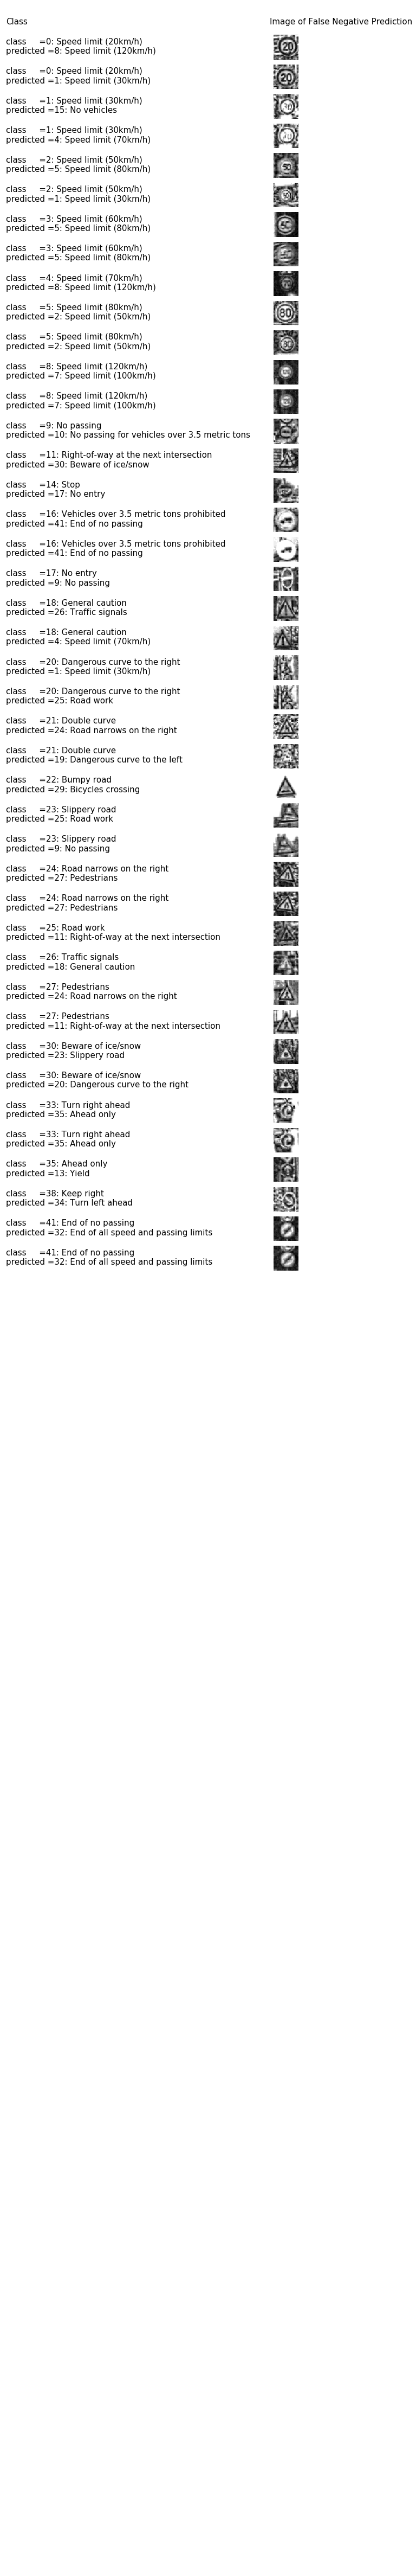

Trained model saved


In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

"""
Train the model on the training data, 
Validate accuracy on the validation data.
"""
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
       
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
         
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={
                        x: batch_x, y: batch_y, keep_prob: 0.5})
               
        accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1)+" - Validation Accuracy = {:.3f}".format(accuracy))
    
    
    predictions = sess.run(tf.argmax(logits, 1), 
                           feed_dict={x:X_valid, keep_prob:1.0})
    summarize_predictions(X_valid, y_valid, predictions, filename=None)
           
    saver.save(sess, './lenet')
    print("Trained model saved")


---
## Once satisfied with training & validation, run on test set

Test Accuracy = 0.951
Prediction summary: 
label                                                          count    true-pos   false-neg false-pos
class =0: Speed limit (20km/h)                                    60    57(95 %)     3(5  %)         1
class =1: Speed limit (30km/h)                                   720   706(98 %)    14(1  %)        30
class =2: Speed limit (50km/h)                                   750   734(97 %)    16(2  %)        26
class =3: Speed limit (60km/h)                                   450   415(92 %)    35(7  %)        10
class =4: Speed limit (70km/h)                                   660   649(98 %)    11(1  %)        23
class =5: Speed limit (80km/h)                                   630   592(93 %)    38(6  %)        36
class =6: End of speed limit (80km/h)                            150   131(87 %)    19(12 %)         1
class =7: Speed limit (100km/h)                                  450   433(96 %)    17(3  %)        25
class =8: Speed limit (120km/h

100%|██████████| 12630/12630 [00:00<00:00, 107942.68it/s]


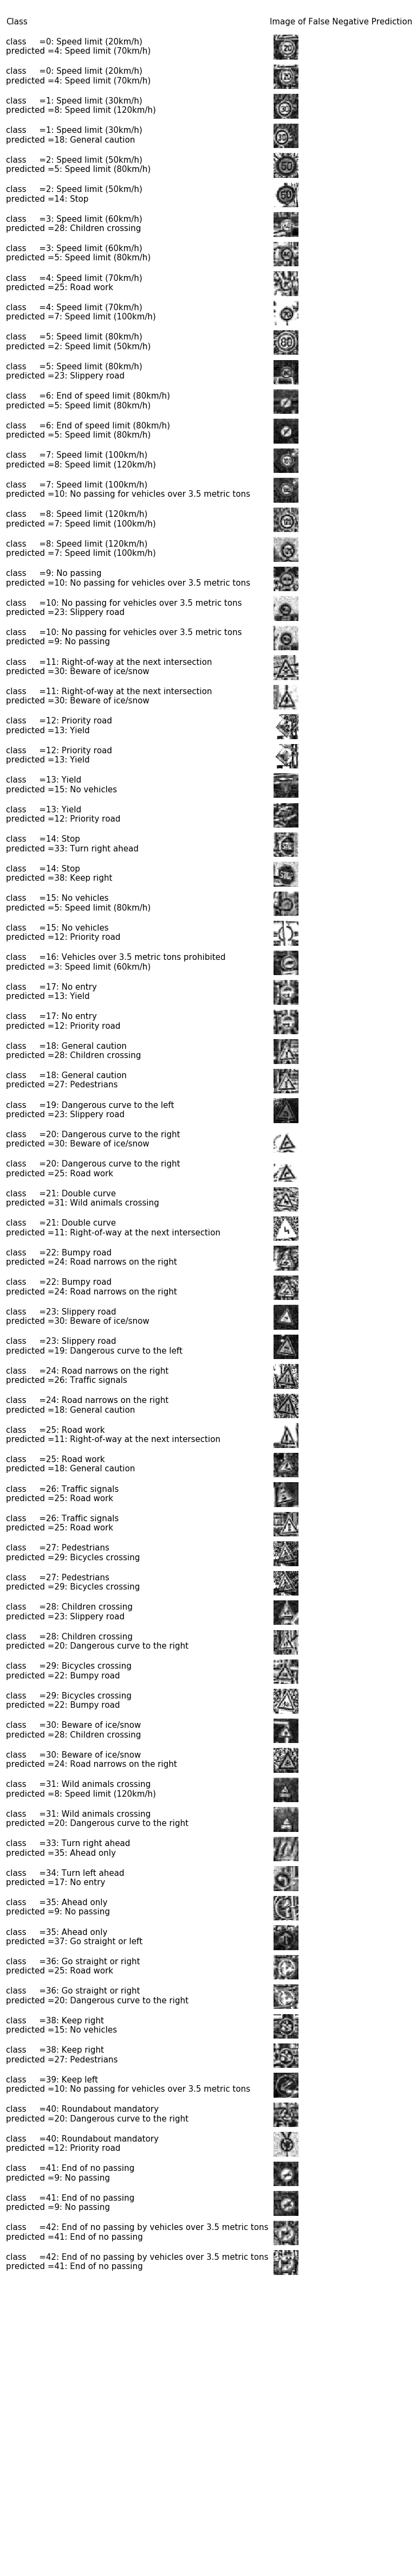

In [14]:
"""
Test the trained model on the test data
"""
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(accuracy))
    
    predictions = sess.run(tf.argmax(logits, 1), 
                               feed_dict={x:X_test, keep_prob:1.0})
    summarize_predictions(X_test, y_test, predictions, filename=None)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

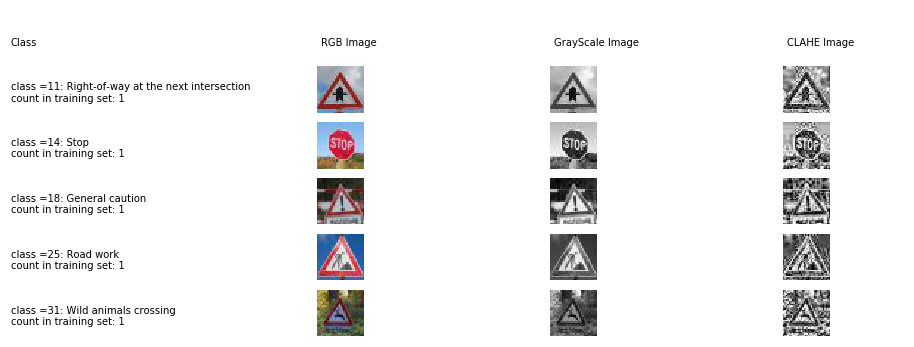

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
"""
Prepared 5 images of 32x32 pixels.
Read, pre-process and plot the images in RGB, grayscale and CLAHE.
"""
new_image_files = ['./data_new_signs/class11.jpg',
                   './data_new_signs/class14.jpg',
                   './data_new_signs/class18.jpg',
                   './data_new_signs/class25.jpg',
                   './data_new_signs/class31.jpg']

y_new = np.array([11, 14, 18, 25, 31])

X_new = None
for image_file in new_image_files:
    new_image = mpimg.imread(image_file)
    if X_new is None:
        X_new = new_image.reshape(1,32,32,3)
    else:
        X_new = np.append(X_new, new_image.reshape(1,32,32,3), axis=0)
        
        

plot_image_and_effects_of_grayscale_and_clahe(X_new,y_new,
                                              filename=None)
                   

### Predict the Sign Type for Each Image

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
"""
Store all 5 images in new data set.
Test & summarize predictions.
"""

print('Applying GrayScale & CLAHE to each image in new data set')
X_new  = np.array([grayscale_and_clahe(X) for X in tqdm(X_new)]).reshape(
            len(X_new),32,32,1)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
 
    accuracy = evaluate(X_new, y_new)
    print("New Images Prediction Accuracy = {:.3f}".format(accuracy))
      
    sess = tf.get_default_session()
    predictions = sess.run(tf.argmax(logits, 1), 
                  feed_dict={x:X_new, keep_prob:1.0})

    summarize_predictions(X_new, y_new, predictions,
                          filename=None)


Applying GrayScale & CLAHE to each image in new data set


100%|██████████| 5/5 [00:00<00:00, 80.64it/s]


New Images Prediction Accuracy = 1.000
Prediction summary: 
label                                                          count    true-pos   false-neg false-pos
class =11: Right-of-way at the next intersection                   1     1(100%)     0(0  %)         0
class =14: Stop                                                    1     1(100%)     0(0  %)         0
class =18: General caution                                         1     1(100%)     0(0  %)         0
class =25: Road work                                               1     1(100%)     0(0  %)         0
class =31: Wild animals crossing                                   1     1(100%)     0(0  %)         0
------------------------------------------------------------------------------------------------------
TOTAL                                                              5           5           0         0


### Analyze Performance

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
"""
Analysis of performance already done in previous cell.
Here just give the accuracy in %-age
"""
print ('New images predicted with '+str(accuracy*100)+'% accuracy')

New images predicted with 100.0% accuracy


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
"""
For each new image, print the top five softmax probabilities.
This shows how certain the prediction is.
"""

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    sess = tf.get_default_session()
    
    softmax = sess.run(tf.nn.softmax(logits), 
                  feed_dict={x:X_new, keep_prob:1.0})
    
    TopKV2  = sess.run(tf.nn.top_k(softmax, k=5), 
                      feed_dict={x:X_new, keep_prob:1.0})

    summarize_top_probabilities(y_new, TopKV2)


Top 5 softmax probabilities
--------------------------------------------------------------------------------
class =11: Right-of-way at the next intersection
Predictions   :['        11', '        30', '        28', '        29', '        24']
Probabilities :['    99.95%', '     0.05%', '     0.00%', '     0.00%', '     0.00%']
--------------------------------------------------------------------------------
class =14: Stop
Predictions   :['        14', '        40', '        17', '         1', '         2']
Probabilities :['    98.25%', '     1.22%', '     0.52%', '     0.01%', '     0.00%']
--------------------------------------------------------------------------------
class =18: General caution
Predictions   :['        18', '        26', '        25', '        27', '        11']
Probabilities :['   100.00%', '     0.00%', '     0.00%', '     0.00%', '     0.00%']
--------------------------------------------------------------------------------
class =25: Road work
Predictions   :['  

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Visualizing layer: conv1


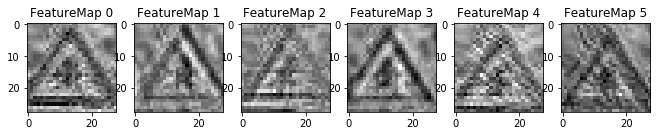

Visualizing layer: conv2


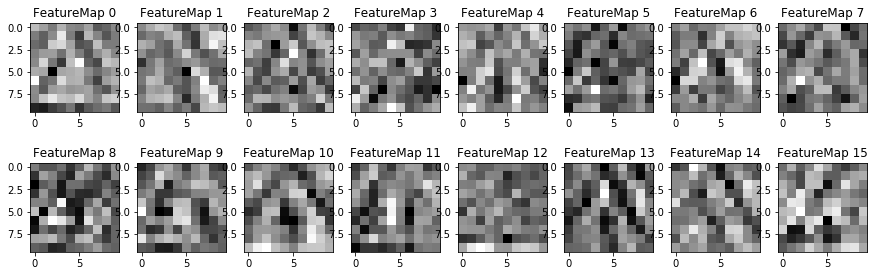

In [19]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a 
# specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    
    print('Visualizing layer: conv1')
    tf_conv1 = sess.run(conv1, feed_dict={x: X_new})
    outputFeatureMap(X_new, conv1)  # 6 FeatureMaps
    plt.show()
    
    print('Visualizing layer: conv2')
    tf_conv2 = sess.run(conv2, feed_dict={x: X_new})
    outputFeatureMap(X_new, conv2)  # 16 FeatureMaps
    plt.show()
    
    # the outputFeatureMap function is not valid for fc1, fc2 and logits. 
    # they do not have correct shape...
    



### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

I need to spend more time experimenting with this capability. I got the code running, and can see how for each layer (conv1, conv2) it plots the images for the outputs (6 featureMaps for conv1, and 16 featureMaps for conv2). It is clear from the images that the first layer (conv1) still resembles the actual image quite closely, but that the 2nd layer (conv2) starts to pixalate things much rougher, and it becomes difficult to visually interpret it.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 